In [1]:
pip install Cython --install-option="--no-cython-compile"

Note: you may need to restart the kernel to use updated packages.



Usage:   
  C:\Users\sai\AppData\Local\Programs\Python\Python311\python.exe -m pip install [options] <requirement specifier> [package-index-options] ...
  C:\Users\sai\AppData\Local\Programs\Python\Python311\python.exe -m pip install [options] -r <requirements file> [package-index-options] ...
  C:\Users\sai\AppData\Local\Programs\Python\Python311\python.exe -m pip install [options] [-e] <vcs project url> ...
  C:\Users\sai\AppData\Local\Programs\Python\Python311\python.exe -m pip install [options] [-e] <local project path> ...
  C:\Users\sai\AppData\Local\Programs\Python\Python311\python.exe -m pip install [options] <archive url/path> ...

no such option: --install-option


In [2]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from Cython.Build.Inline import _get_build_extension
import seaborn as sns
import tensorflow as tf
import keras


In [3]:
# Load the data from a CSV file
df = pd.read_csv("F:\stock price prediction\TATAPOWER.NS.csv")
df


,Date,Open,High,Low,Close,Adj Close,Volume
0,1996-01-01,11.580205,11.662232,11.488529,11.628456,5.920810,33160.0
1,1996-01-02,11.628456,11.739433,11.396852,11.483704,5.847106,176162.0
2,1996-01-03,11.483704,11.599506,11.392027,11.411327,5.810256,104661.0
3,1996-01-04,11.411327,11.387202,11.155598,11.242449,5.724267,77718.0
4,1996-01-05,11.242449,11.483704,11.097697,11.464403,5.837280,113469.0
...,...,...,...,...,...,...,...
6874,2023-04-24,196.500000,196.699997,194.800003,195.850006,195.850006,5017631.0
6875,2023-04-25,195.850006,198.800003,195.350006,197.649994,197.649994,5957551.0
6876,2023-04-26,197.649994,198.949997,196.149994,198.199997,198.199997,4910837.0
6877,2023-04-27,198.449997,199.949997,197.649994,198.500000,198.500000,5215692.0


In [4]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1996-01-01,11.580205,11.662232,11.488529,11.628456,5.920810,33160.0
1,1996-01-02,11.628456,11.739433,11.396852,11.483704,5.847106,176162.0
2,1996-01-03,11.483704,11.599506,11.392027,11.411327,5.810256,104661.0
3,1996-01-04,11.411327,11.387202,11.155598,11.242449,5.724267,77718.0
4,1996-01-05,11.242449,11.483704,11.097697,11.464403,5.837280,113469.0


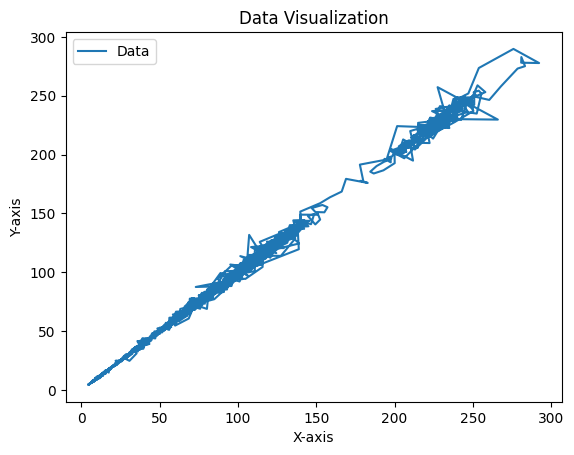

In [6]:
# Create a line plot of the data
plt.plot(df['Open'], df['Close'], label='Data')

# Add a title and axis labels
plt.title('Data Visualization')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')

# Show a legend
plt.legend()

# Show the plot
plt.show()

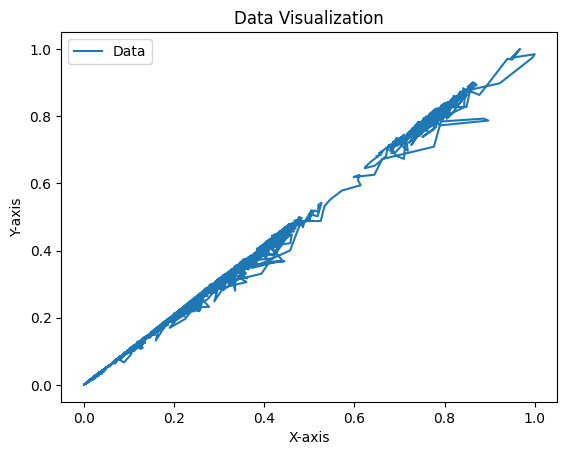

In [14]:
# Create a line plot of the data
plt.plot(df['High'], df['Low'], label='Data')

# Add a title and axis labels
plt.title('Data Visualization')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')

# Show a legend
plt.legend()

# Show the plot
plt.show()

In [9]:
df.head()


,Date,Open,High,Low,Close,Adj Close,Volume,MA_7,MA_14,MA_21,EMA_7,EMA_14,EMA_21
0,1996-01-01,11.580205,11.662232,11.488529,11.628456,5.920810,33160.0,NaN,NaN,NaN,11.628456,11.628456,11.628456
1,1996-01-02,11.628456,11.739433,11.396852,11.483704,5.847106,176162.0,NaN,NaN,NaN,11.592268,11.609156,11.615297
2,1996-01-03,11.483704,11.599506,11.392027,11.411327,5.810256,104661.0,NaN,NaN,NaN,11.547033,11.582779,11.596754
3,1996-01-04,11.411327,11.387202,11.155598,11.242449,5.724267,77718.0,NaN,NaN,NaN,11.470887,11.537401,11.564544
4,1996-01-05,11.242449,11.483704,11.097697,11.464403,5.837280,113469.0,NaN,NaN,NaN,11.469266,11.527668,11.555441


In [17]:
# Feature engineering: add technical indicators
df.loc[:, 'MA_7'] = df['Close'].rolling(window=7).mean()
df.loc[:,'MA_14'] = df['Close'].rolling(window=14).mean()
df.loc[:,'MA_21'] = df['Close'].rolling(window=21).mean()
df.loc[:,'EMA_7'] = df['Close'].ewm(span=7, adjust=False).mean()
df.loc[:,'EMA_14'] = df['Close'].ewm(span=14, adjust=False).mean()
df.loc[:,'EMA_21'] = df['Close'].ewm(span=21, adjust=False).mean()

C:\Users\sai\AppData\Local\Temp\ipykernel_11144\820263434.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, 'MA_7'] = df['Close'].rolling(window=7).mean()
C:\Users\sai\AppData\Local\Temp\ipykernel_11144\820263434.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:,'MA_14'] = df['Close'].rolling(window=14).mean()
C:\Users\sai\AppData\Local\Temp\ipykernel_11144\820263434.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_in

In [10]:
# Split the data into training, validation, and testing sets
train, test = train_test_split(df, test_size=0.2, random_state=42)
train, val = train_test_split(train, test_size=0.2, random_state=42)


In [11]:
# Create the feature matrix X and the target vector y for each set
X_train = train[['Open', 'High', 'Low', 'MA_7', 'MA_14', 'MA_21', 'EMA_7', 'EMA_14', 'EMA_21']]
y_train = train['Close']
X_val = val[['Open', 'High', 'Low', 'MA_7', 'MA_14', 'MA_21', 'EMA_7', 'EMA_14', 'EMA_21']]
y_val = val['Close']
X_test = test[['Open', 'High', 'Low', 'MA_7', 'MA_14', 'MA_21', 'EMA_7', 'EMA_14', 'EMA_21']]
y_test = test['Close']


In [12]:
# Normalize the data using MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df['Open'] = scaler.fit_transform(df[['Open']])
df['High'] = scaler.fit_transform(df[['High']])
df['Low'] = scaler.fit_transform(df[['Low']])
df['Close'] = scaler.fit_transform(df[['Close']])

C:\Users\sai\AppData\Local\Temp\ipykernel_11144\1479579406.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Open'] = scaler.fit_transform(df[['Open']])
C:\Users\sai\AppData\Local\Temp\ipykernel_11144\1479579406.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['High'] = scaler.fit_transform(df[['High']])
C:\Users\sai\AppData\Local\Temp\ipykernel_11144\1479579406.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexe

In [13]:
# Train a Random Forest Regressor model
model = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)
model.fit(X_train, y_train)

ValueError: Input X contains NaN.
RandomForestRegressor does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [ ]:
# Evaluate the model on the validation set
y_val_pred = model.predict(X_val)
mse = mean_squared_error(y_val, y_val_pred)
print('Mean Squared Error on Validation Set:', mse)

In [ ]:
# Test the model on the testing set
y_test_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_test_pred)
print('Mean Squared Error on Testing Set:', mse)

In [ ]:
# Plot the predicted and actual prices for the testing set
plt.plot(y_test_pred, label='Predicted')
plt.plot(y_test.values, label='Actual')
plt.legend()
plt.show()

In [ ]:

# Create a heatmap of the correlation matrix
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')

# Show the plot
plt.show()

In [ ]:
# Save the model to a file
import joblib
joblib.dump(model, 'stock_model.joblib')

In [ ]:

# Load the model from the file and use it to make predictions
model = joblib.load('stock_model.joblib')
X_new = [[0.5, 0.6, 0.4]]
y_new_pred = model.predict(X_new)
print('Predicted Close Price:', y_new_pred)